In [4]:
from rdkit import Chem

sdf_path = "/home/bio_science/data/chembl_35.sdf"  # gunzip으로 압축 해제 후 나오는 SDF 파일 경로
supplier = Chem.SDMolSupplier(sdf_path)


cnt = 0
for mol in supplier:
    if mol is None:
        continue

    # MolToSmiles()로 Smiles로 변환
    smiles = Chem.MolToSmiles(mol)

    # SMILES로 Molecule object를 생성
    mol = Chem.MolFromSmiles(smiles)

    # MolToInchi()로 InChI로 변환
    inchi = Chem.MolToInchi(mol)

    print(f"Molecule {cnt+1}:")
    print(f"  Smiles: {smiles}")
    print(f"  InChI: {inchi}")

    cnt += 1
    if cnt > 9:
        break

Molecule 1:
  Smiles: Cc1cc(-c2csc(N=C(N)N)n2)cn1C
  InChI: InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10(13-8)14-9(11)12/h3-5H,1-2H3,(H4,11,12,13,14)
Molecule 2:
  Smiles: CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@@H](N)CCSC)[C@@H](C)O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)N[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCN=C(N)N)C(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](CCCN=C(N)N)C(N)=O
  InChI: InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-115(196)81(47-62(10)11)163-119(200)97(68(17)169)165-103(184)70(124)36-42-202-18)118(199)143-52-92(175)147-65(14)100(181)149-67(16)102(183)157-82(48-69-50-136-57-145-69)114(195)162-83(49-90(128)173)106(187)141-51-91(174)146-64(13)99(180)148-66(15)101(182)153-75(31-34-88(126)171)10

[12:49:12] WARNING: Omitted undefined stereo



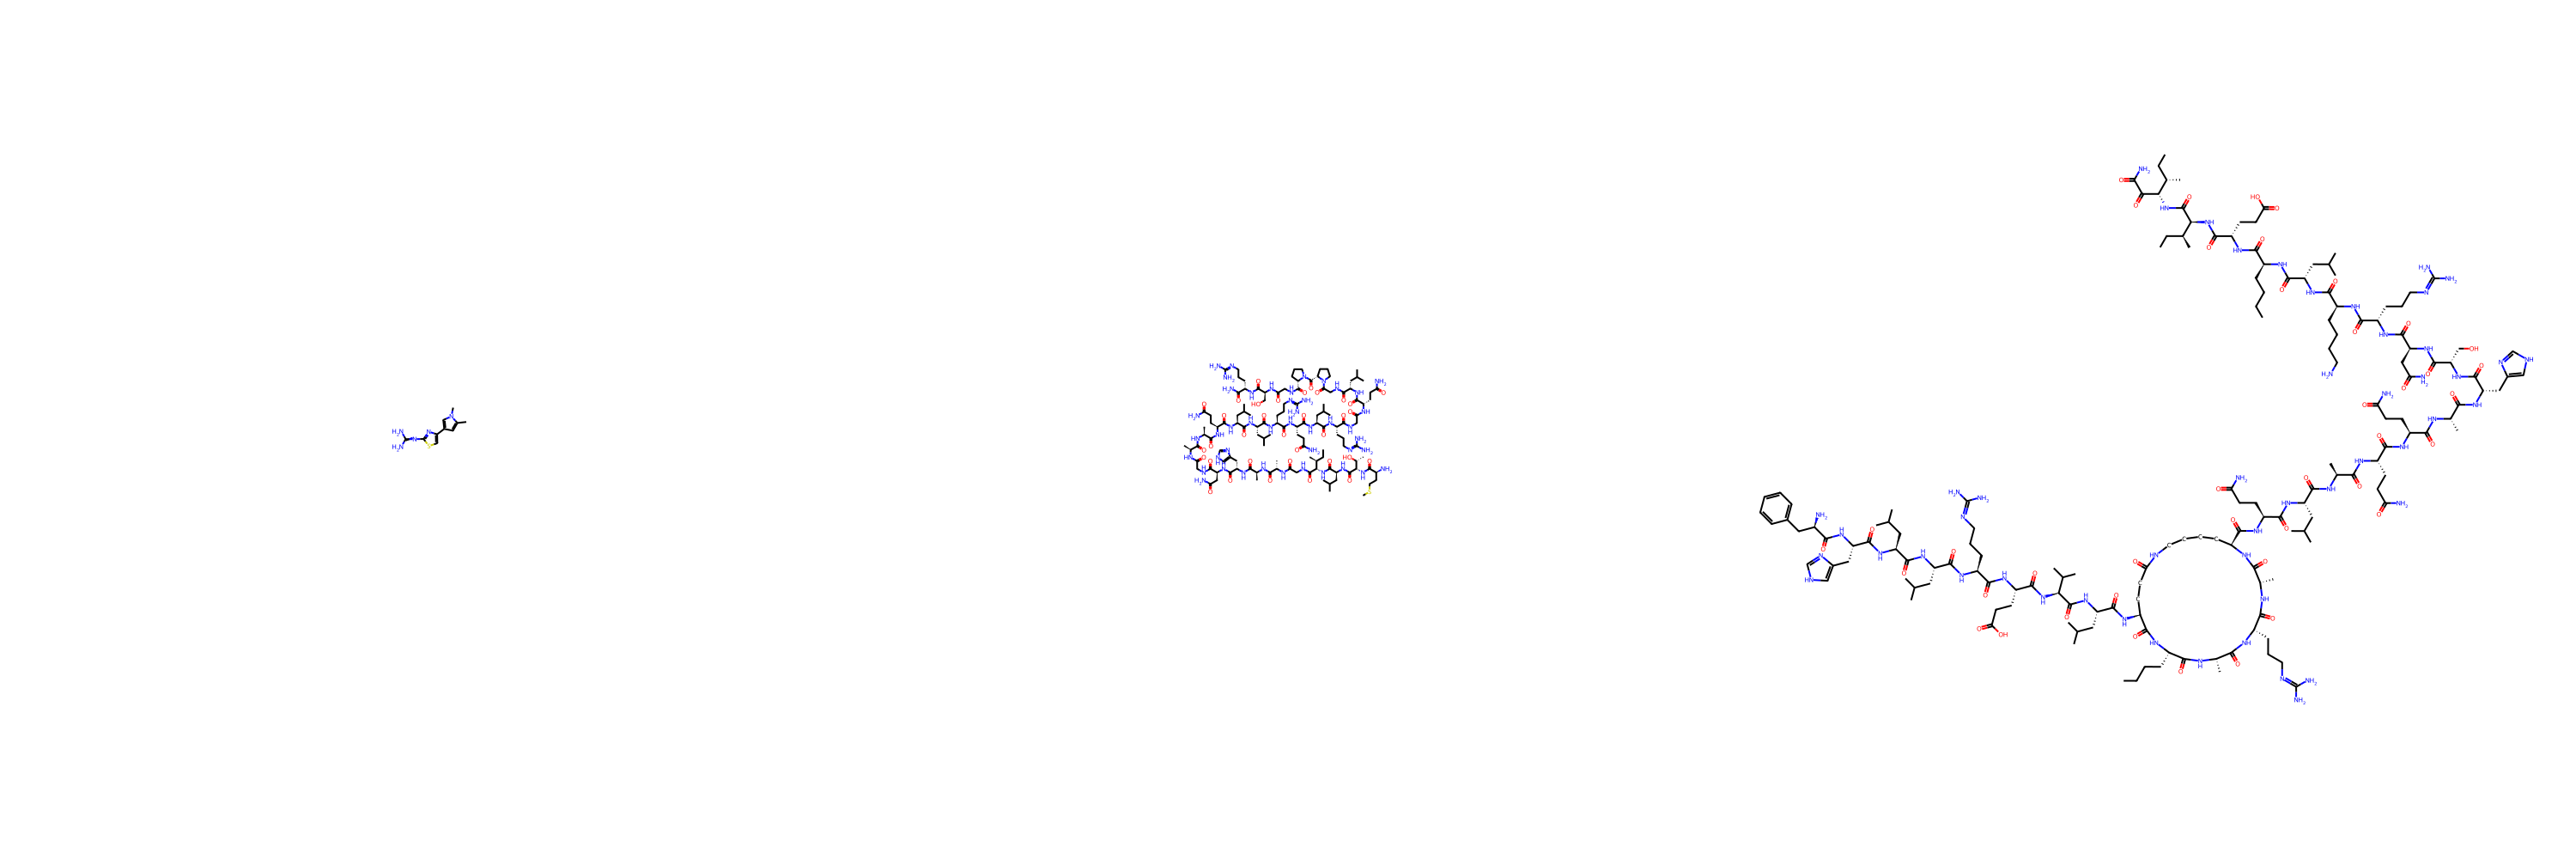

In [ ]:
# 시각화
from rdkit.Chem.Draw import MolsToGridImage

supplier = Chem.SDMolSupplier(sdf_path)
mols = []

for i, mol in enumerate(supplier):
    if mol is None:
        continue
    mols.append(mol)
    if i == 2:
        break

img = MolsToGridImage(mols, molsPerRow=3, subImgSize=(1000,1000))
img

In [16]:
# 너무 많으면 CSV로 변환
import pandas as pd

supplier = Chem.SDMolSupplier(sdf_path)
data = []
max_count = 1000

for i, mol in enumerate(supplier):
    if mol is None:
        continue

    smi = Chem.MolToSmiles(mol)
    if mol.HasProp("chembl_id"):
        cid = mol.GetProp("chembl_id")
    elif mol.HasProp("_Name"):
        cid = mol.GetProp("_Name")
    else:
        cid = f"compound_{i}"

    data.append([cid, smi])
    if len(data) >= max_count:
        break



In [17]:
df = pd.DataFrame(data, columns=["chembl_id", "smiles"])
df.head()

,chembl_id,smiles
0,CHEMBL153534,Cc1cc(-c2csc(N=C(N)N)n2)cn1C
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...
2,CHEMBL440245,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1


In [20]:
# Properties 확인
supplier = Chem.SDMolSupplier(sdf_path)
mol = next(iter(supplier)) 
print("Available properties:", list(mol.GetPropNames()))

Available properties: ['chembl_id']
